# Image Thresholding
所謂的二值化是將影像進行區分，分成我們感興趣的部分(前景)，以及不感興趣的部分(背景)，通常將某個強度當作分割的標準，這個強度稱作閾值(threshold)，通常以強度超過閾值的像素當作前景，反之則為背景。

## 閾值的算法主要分兩類：

 - **固定閾值**：程式或使用者直接給定一個灰階值當閾值，再用這個閾值進行二值化。
 - **自適應閾值**：輸入影像，程式依這影像計算出較合適的閾值，再用這個閾值進行二值化。
 


# 固定閾值 (Simple Thresholding)
## threshold(src, thresh, maxval, type[, dst]) -> retval, dst
 - src：輸入圖，只能輸入單通道，8位元或32位元浮點數影像。
 - dst：輸出圖，尺寸大小、深度會和輸入圖相同。
 - thresh：閾值。
 - maxval：二值化結果的最大值。
 - type：二值化操作型態:
     - THRESH_BINARY
     - THRESH_BINARY_INV 
     - THRESH_TRUNC
     - THRESH_TOZERO
     - THRESH_TOZERO_IN
     
<img src="images/threshold1.png" style="width:600px;">

In [1]:
import cv2
from utils import show, plt, show_images

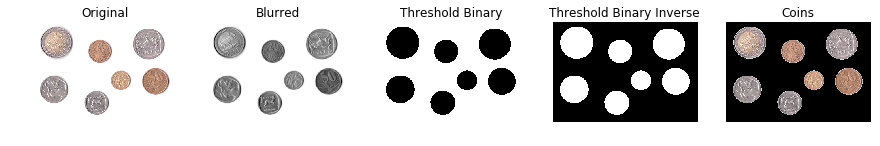

In [2]:
img = cv2.cvtColor(cv2.imread('images/coins.png'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)
(T, thresh) = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY)
(T, threshInv) = cv2.threshold(blurred, 220, 255, cv2.THRESH_BINARY_INV)
coins = cv2.bitwise_and(img, img, mask=threshInv)
show_images(
    [img, blurred, thresh, threshInv, coins], 
    ['Original', 'Blurred', 'Threshold Binary', 'Threshold Binary Inverse', 'Coins'], 
    False)

# 區域閾值(adaptiveThreshold)
有時候由於拍照時光線不均，所以影像每個區域的灰階值基準不同，這時很難找到一個閾值能適用整張影像，然後得到良好的二值化結果，這時我們可以將影像分成幾個區域，每個區域有各自的閾值，再分別將各個區域進行二值化，OpenCV用adaptiveThreshold()函式來進行此作法。

### adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst

 - src：輸入圖，只能輸入8位元單通道圖。
 - dst：輸出圖，尺寸大小、深度會和輸入圖相同。
 - maxValue：最大值，adaptiveThreshold會將像素分成0和maxValue。
 - adaptiveMethod：區域閾值方法：可以選擇 **ADAPTIVE_THRESH_MEAN_C** 或 **ADAPTIVE_THRESH_GAUSSIAN_C** ，兩者決定閾值的方式不同。
     - **ADAPTIVE_THRESH_MEAN_C**:閾值為blockSize*blockSize像素內的平均減去C。
     - **ADAPTIVE_THRESH_GAUSSIAN_C**(weighted mean)：閾值為blockSize*blockSize像素內的高斯加權平均減去C。
 - thresholdType：二值化型態：有 **THRESH_BINARY** 和 **THRESH_BINARY_INV** 兩種型態可選。
     - **THRESH_BINARY**：超過閾值的像素設為maxvalue，小於閾值的設為0。
     - **THRESH_BINARY_INV**：超過閾值的像素設為0，小於閾值的設為maxvalue。
 - blockSize：區域尺寸，用幾個像素來決定閾值，只能選擇奇數像3、5、7……等。
 - C：常數，計算閾值時，要從平均或加權平均減去的數

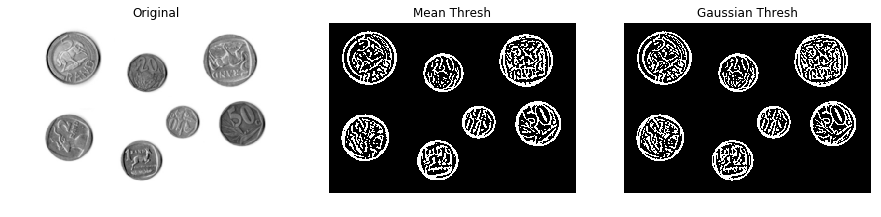

In [9]:
img = cv2.cvtColor(cv2.imread('images/coins.png'), cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(img_gray, (5, 5), 0)

thresh_mean = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV, 11, 4)

thresh_gaussian = cv2.adaptiveThreshold(blurred, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 15, 3)

show_images([blurred, thresh_mean, thresh_gaussian], ['Original', 'Mean Thresh', 'Gaussian Thresh'], ver=False)

# 自適應閾值(threshold、CV_THRESH_OTSU)
所謂的二值化是將影像進行區分，分成我們感興趣的部分(前景)，以及不感興趣的部分(背景)，通常將某個強度當作分割的標準，這個強度稱作閾值(threshold)，通常以強度超過閾值的像素當作前景，反之則為背景。

Otsu’s method assumes there are two peaks in the grayscale
histogram of the image. It then tries to find an optimal
value to separate these two peaks – thus our value of T.

### Otsu流程：

 1. 先計算影像的直方圖
 2. 把直方圖強度大於閾值的像素分成一組，把小於閾值的像素分成另一組。
 3. 分別計算這兩組的組內變異數，並把兩個組內變異數相加。
 4. 將0~255依序當作閾值來計算組內變異數和，總和值最小的就是結果閾值。
 
### threshold(src, thresh, maxval, type[, dst]) -> retval, dst
 - src：輸入圖，只能輸入單通道，8位元或32位元浮點數影像。
 - dst：輸出圖，尺寸大小、深度會和輸入圖相同。
 - thresh：閾值。
 - maxval：二值化結果的最大值。
 - type：二值化操作型態，共有THRESH_BINARY、THRESH_BINARY_INV、THRESH_TRUNC、THRESH_TOZERO、THRESH_TOZERO_INV五種。type從上述五種結合CV_THRESH_OTSU，類似寫成：THRESH_BINARY | CV_THRESH_OTSU

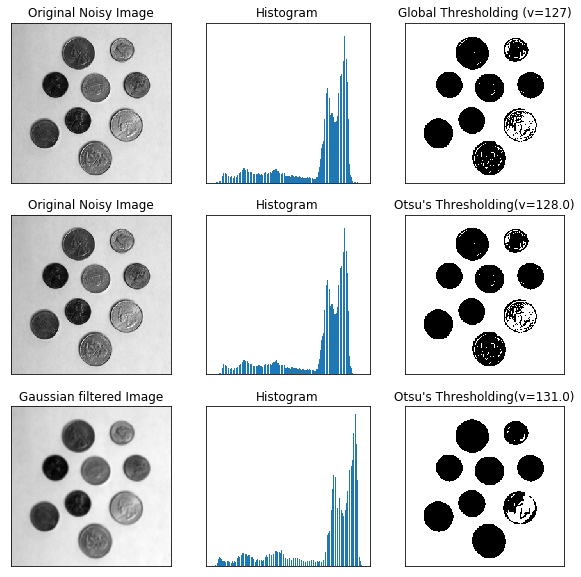

In [5]:
import cv2 as cv
img = cv2.cvtColor(cv2.imread('images/coins.png'), cv2.COLOR_BGR2RGB)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# global thresholding
ret1,th1 = cv.threshold(img,127,255,cv.THRESH_BINARY)
# Otsu's thresholding
ret2,th2 = cv.threshold(img,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# Otsu's thresholding after Gaussian filtering
blur = cv.GaussianBlur(img,(5,5),0)
ret3,th3 = cv.threshold(blur,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
# plot all the images and their histograms
images = [img, 0, th1,
          img, 0, th2,
          blur, 0, th3]
titles = ['Original Noisy Image','Histogram','Global Thresholding (v=127)',
          'Original Noisy Image','Histogram', f"Otsu's Thresholding(v={ret2})",
          'Gaussian filtered Image','Histogram', f"Otsu's Thresholding(v={ret3})"]

plt.figure(figsize=(10,10))
for i in range(3):
    plt.subplot(3,3,i*3+1),plt.imshow(images[i*3],'gray')
    plt.title(titles[i*3]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+2),plt.hist(images[i*3].ravel(),256)
    plt.title(titles[i*3+1]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,3,i*3+3),plt.imshow(images[i*3+2],'gray')
    plt.title(titles[i*3+2]), plt.xticks([]), plt.yticks([])
plt.show()

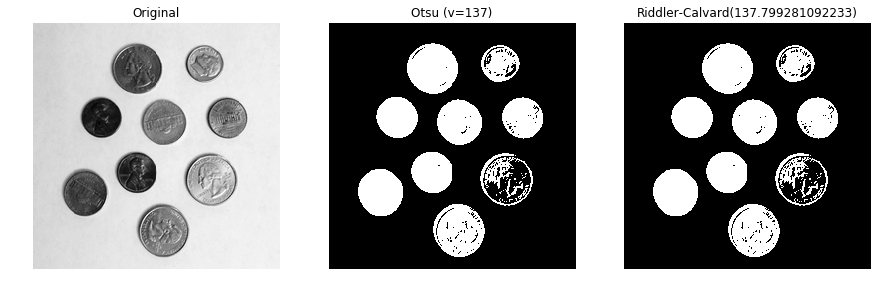

In [4]:
import mahotas
import cv2

image = cv2.imread('images/coins.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
blurred = cv2.GaussianBlur(image, (5, 5), 0)

T1 = mahotas.thresholding.otsu(blurred)

thresh = image.copy()
thresh[thresh > T1] = 255
thresh[thresh < 255] = 0
thresh1 = cv2.bitwise_not(thresh)
# cv2.imshow("Otsu", thresh)

T2 = mahotas.thresholding.rc(blurred)    
thresh = image.copy()
thresh[thresh > T2] = 255
thresh[thresh < 255] = 0
thresh2 = cv2.bitwise_not(thresh)
# cv2.imshow("Riddler-Calvard", thresh)
# cv2.waitKey(0)

show_images([image, thresh1, thresh2], ['Original', f'Otsu (v={T1})', f'Riddler-Calvard({T2})'], False)


# Image Segmentation with Watershed Algorithm
### [Reference](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_watershed/py_watershed.html)

162.0


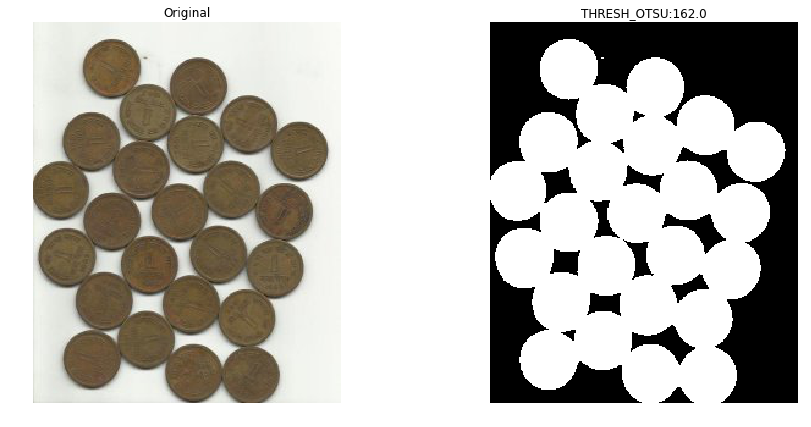

In [3]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

img = cv2.imread('images/water_coins.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(gray,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
print(ret)
show_images([img, thresh], ['Original', f'THRESH_OTSU:{ret}'], ver=False)

In [ ]:
# Pending ....

# 補充: Python的 numpy中 numpy.ravel() 和numpy.flatten()的區別和使用

兩者所要實現的功能是一致的（將多維數組降為一維），

兩者的區別在於返回拷貝（copy）還是返回視圖（view），numpy.flatten() 返回一份拷貝，對拷貝所做的修改不會影響（reflects）原始矩陣，

而numpy.ravel()返回的是視圖（view），會影響（reflects）原始矩陣。

<img src="images/np.png" style="width:550px;">